# Coupled inductor circuits
Last update: 14 Feb 2022  

In this notebook, the Python modules SymPy and SciPy are used to solve for currents and voltages in ciruits that have coupled inductors. The first circuit specifies the inductor values and the coupling in terms of Henry. The second circuit is of a traditional transformer circuit where the turns ratio is given and the coupling constant is assumed to be 1.  

A coupled inductor has two or more windings that are connected by a magnetic circuit. Coupled inductors transfer energy from one winding to a different winding usually through a commonly used core. The efficiency of the magnetic coupling between both the windings is defined by the coupling factor k or by mutual inductance.

The coupling constant and the mutual inductance are related by the equation:

$k = \frac {M}{\sqrt{L1 \times L2}}$

Where k is the coupling coefficient and in spice the value of k can be from -1 to +1 to account foa a negative phase relation. Phase dots are drawn on the schematic to indicate the relative direction of the windings.  In LTspice the phase dots are associated with the negative terminal of the winding.

Reference: https://en.wikipedia.org/wiki/Inductance#Mutual_inductance

In [29]:
from sympy import *
import numpy as np
init_printing()

## Coupled inductor circuit 1
The first circuit is shown below. The inductors L1 and L2 have a coupling constant defined in terms of mutual inductance as 0.5j.
 
<img src="coupled_inductors_circuit_1.PNG" width="500">

The coupling constant from the mutual inductance.

In [30]:
# calculate the coupling constant from the mutual inductance
M1 = 0.5/np.sqrt(2*3)
print('coupling constant, k = {:.4f}'.format(M1))

coupling constant, k = 0.2041


The netlist for this circuit is:
```
V1 1 0 AC 1
K1 L1 L2 0.20412
L1 0 3 2
L2 0 5 3
C1 4 5 0.33333
R1 1 4 10
R2 4 3 1
```
The mutual coupling of 0.5J has been converted to a coupling constant of 0.20412.  The value of M is used in the node equations and the equivalent k is used by LTspice in the K1 statement.

The following equations generated by the NMA [code](https://github.com/Tiburonboy/Symbolic-modified-nodal-analysis). 
```
[[Eq(I_V1 + v1/R1 - v2/R1, 0)],
[Eq(-C1*s*v4 + v2*(C1*s + 1/R2 + 1/R1) - v3/R2 - v1/R1, 0)],
[Eq(-I_L1 - v2/R2 + v3/R2, 0)],
[Eq(-C1*s*v2 + C1*s*v4 - I_L2, 0)],
[Eq(v1, V1)],
[Eq(-I_L1*L1*s - I_L2*M1*s - v3, 0)],
[Eq(-I_L1*M1*s - I_L2*L2*s - v4, 0)]]
```

In [31]:
# declare the following symbols
C1, I_L2, R2, L1, V1, s, I_V1, v4, v1, v3, v2, R1, I_L1, L2, M1 = symbols('C1 I_L2 R2 L1 V1 s I_V1 v4 v1 v3 v2 R1 I_L1 L2 M1')

# use the equations generated by nodal analysis
equ = Matrix(
    [[Eq(I_V1 + v1/R1 - v2/R1, 0)],
    [Eq(-C1*s*v4 + v2*(C1*s + 1/R2 + 1/R1) - v3/R2 - v1/R1, 0)],
    [Eq(-I_L1 - v2/R2 + v3/R2, 0)],
    [Eq(-C1*s*v2 + C1*s*v4 - I_L2, 0)],
    [Eq(v1, V1)],
    [Eq(-I_L1*L1*s - I_L2*M1*s - v3, 0)],
    [Eq(-I_L1*M1*s - I_L2*L2*s - v4, 0)]])
equ   # display the equations

⎡                    v₁   v₂                 ⎤
⎢             I_V1 + ── - ── = 0             ⎥
⎢                    R₁   R₁                 ⎥
⎢                                            ⎥
⎢              ⎛       1    1 ⎞   v₃   v₁    ⎥
⎢-C₁⋅s⋅v₄ + v₂⋅⎜C₁⋅s + ── + ──⎟ - ── - ── = 0⎥
⎢              ⎝       R₂   R₁⎠   R₂   R₁    ⎥
⎢                                            ⎥
⎢                    v₂   v₃                 ⎥
⎢            -I_L1 - ── + ── = 0             ⎥
⎢                    R₂   R₂                 ⎥
⎢                                            ⎥
⎢       -C₁⋅s⋅v₂ + C₁⋅s⋅v₄ - I_L2 = 0        ⎥
⎢                                            ⎥
⎢                  v₁ = V₁                   ⎥
⎢                                            ⎥
⎢      -I_L1⋅L₁⋅s - I_L2⋅M₁⋅s - v₃ = 0       ⎥
⎢                                            ⎥
⎣      -I_L1⋅M₁⋅s - I_L2⋅L₂⋅s - v₄ = 0       ⎦

We can use the power of SymPy to find the symbolic solution to the system of equations.

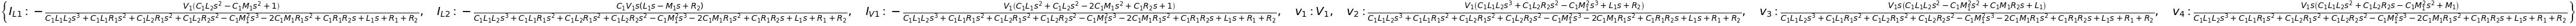

In [32]:
solve(equ,[v1, v2, v3, v4, I_V1, I_L1, I_L2])

We can find a numerical solution by substituting element values into the equations.

In [33]:
equ1a = equ.subs({L1:2,L2:3,C1:0.33333,R1:10,R2:1,V1:1,M1:0.5,s:1j})
equ1a  # display the equations

⎡                       v₁   v₂                    ⎤
⎢                I_V1 + ── - ── = 0                ⎥
⎢                       10   10                    ⎥
⎢                                                  ⎥
⎢  v₁      ⎛11            ⎞                        ⎥
⎢- ── + v₂⋅⎜── + 0.33333⋅ⅈ⎟ - v₃ - 0.33333⋅ⅈ⋅v₄ = 0⎥
⎢  10      ⎝10            ⎠                        ⎥
⎢                                                  ⎥
⎢               -I_L1 - v₂ + v₃ = 0                ⎥
⎢                                                  ⎥
⎢     -I_L2 - 0.33333⋅ⅈ⋅v₂ + 0.33333⋅ⅈ⋅v₄ = 0      ⎥
⎢                                                  ⎥
⎢                      v₁ = 1                      ⎥
⎢                                                  ⎥
⎢        -2.0⋅ⅈ⋅I_L1 - 0.5⋅ⅈ⋅I_L2 - v₃ = 0         ⎥
⎢                                                  ⎥
⎣        -0.5⋅ⅈ⋅I_L1 - 3.0⋅ⅈ⋅I_L2 - v₄ = 0         ⎦

The unknowns are colved for using the SymPy solve function.

In [34]:
ans = solve(equ1a,[v1, v2, v3, v4, I_V1, I_L1, I_L2])
ans

Print the maghitude and phase so the results can be compared to the LTspice solution.

In [35]:
print('v1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v1])),float(arg(ans[v1])*180/np.pi)))
print('v2 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v2])),float(arg(ans[v2])*180/np.pi)))
print('v3 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v3])),float(arg(ans[v3])*180/np.pi)))
print('v4 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v4])),float(arg(ans[v4])*180/np.pi)))

print('I_V1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_V1])),float(arg(ans[I_V1])*180/np.pi)))
print('I_L1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_L1])),float(arg(ans[I_L1])*180/np.pi)))
print('I_L2 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_L2])),float(arg(ans[I_L2])*180/np.pi)))

v1 mag: 1.0000 phase: 0.0000 deg
v2 mag: 0.0175 phase: -44.2984 deg
v3 mag: 0.0390 phase: 19.1379 deg
v4 mag: 0.3633 phase: 100.4907 deg
I_V1 mag: 0.0988 phase: -179.2924 deg
I_L1 mag: 0.0349 phase: 45.7084 deg
I_L2 mag: 0.1259 phase: -167.9816 deg


Results from LTspice agree with the MNA solution.
```
--- AC Analysis ---
frequency:	0.159155	Hz
V(3):	mag:  0.0390384 phase:     19.138° 	voltage
V(4):	mag:   0.363282 phase:     100.49° 	voltage
V(2):	mag:  0.0174613 phase:   -44.2986° 	voltage
V(1):	mag:          1 phase:          0° 	voltage
I(C1):	mag:   0.125893 phase:    12.0179° 	device_current
I(L2):	mag:   0.125893 phase:   -167.982° 	device_current
I(L1):	mag:  0.0349175 phase:    45.7077° 	device_current
I(R2):	mag:  0.0349175 phase:   -134.292° 	device_current
I(R1):	mag:  0.0987578 phase:   0.707527° 	device_current
I(V1):	mag:  0.0987578 phase:   -179.292° 	device_current
```


## Coupled inductor circuit 2
The second circuit has two independent voltage sources and a transformer. The turn ratio of the transformer is specified as 1:2. The coupling constant is assumed to be 1. 

<img src="coupled_inductors_circuit_2.PNG" width="750">

The netlist for circuit 2 is:
```
R1 1 2 2
R2 1 4 16
R3 6 7 20
C1 2 3 0.25
C2 5 6 0.08333
L1 4 6 8
L2 0 3 100
L3 0 5 400
V1 1 0 AC 40 60
V2 7 0 AC 30 0
K1 L2 L3 1
```
From the turns ratio of 1:2, the ratio of inductances for each winding can be found with the equation:  

$\frac {L_1}{L_2} = \left( \frac {N_1}{N_2} \right) ^2$

Since the transformer is assumed to be ideal, the inductance is chosen to be a large value compared to the resistance seen by the winding.

From the turns ratio of 1:2, the ratio of inductances for each winding can be found with the equation:  


$\frac {L_1}{L_2} = \left( \frac {N_1}{N_2} \right) ^2$


Since the transformer is assumed to be ideal, the inductance is chosen to be a large value compared to the resistance seen by the winding.

On the L2 side of the transformer, there is C2 of -12J ohms and R3 of 20 ohms.  So taking the magnitude of these in series is 22 ohms. Make L2 10 times larger, L2 = 220.

In [36]:
N1 = 1 # number of turns on the primary
N2 = 2 # number of turns on the secondary

L2 = 22*10 # making L 10 times larger than the 22 ohms seen by the secondary
L1 = ((N1/N2)**2)*L2
print('L1={:.1f}H, L2={:.1f}H'.format(L1,L2))

L1=55.0H, L2=220.0H


Calculate the mutual coupling for the transformer if the coupling constant is k=1

In [37]:
k = 1
M = np.sqrt(L1*L2)
print('mutual inductance M = {:.1f}H'.format(M))

mutual inductance M = 110.0H


The equations generated by the MNA are:
```
[[Eq(I_V1 + v1*(1/R2 + 1/R1) - v4/R2 - v2/R1, 0)],
[Eq(-C1*s*v3 + v2*(C1*s + 1/R1) - v1/R1, 0)],
[Eq(-C1*s*v2 + C1*s*v3 - I_L2, 0)],
[Eq(I_L1 - v1/R2 + v4/R2, 0)],
[Eq(C2*s*v5 - C2*s*v6 - I_L3, 0)],
[Eq(-C2*s*v5 - I_L1 + v6*(C2*s + 1/R3) - v7/R3, 0)],
[Eq(I_V2 - v6/R3 + v7/R3, 0)],
[Eq(v1, V1)],
[Eq(v7, V2)],
[Eq(-I_L1*L1*s + v4 - v6, 0)],
[Eq(-I_L2*L2*s - I_L3*M1*s - v3, 0)],
[Eq(-I_L2*M1*s - I_L3*L3*s - v5, 0)]]
```

In [38]:
# declare the following symbols
v3, V1, v1, v5, C2, v7, C1, R1, V2, v6, R3, s, I_L3, I_V2, L1, v2, v4, I_V1, I_L2, L2, R2, M1, I_L1, L3 = symbols('v3 V1 v1 v5 C2 v7 C1 R1 V2 v6 R3 s I_L3 I_V2 L1 v2 v4 I_V1 I_L2 L2 R2 M1 I_L1 L3')

# use the equations generated by nodal analysis
equ = Matrix(
    [[Eq(I_V1 + v1*(1/R2 + 1/R1) - v4/R2 - v2/R1, 0)],
    [Eq(-C1*s*v3 + v2*(C1*s + 1/R1) - v1/R1, 0)],
    [Eq(-C1*s*v2 + C1*s*v3 - I_L2, 0)],
    [Eq(I_L1 - v1/R2 + v4/R2, 0)],
    [Eq(C2*s*v5 - C2*s*v6 - I_L3, 0)],
    [Eq(-C2*s*v5 - I_L1 + v6*(C2*s + 1/R3) - v7/R3, 0)],
    [Eq(I_V2 - v6/R3 + v7/R3, 0)],
    [Eq(v1, V1)],
    [Eq(v7, V2)],
    [Eq(-I_L1*L1*s + v4 - v6, 0)],
    [Eq(-I_L2*L2*s - I_L3*M1*s - v3, 0)],
    [Eq(-I_L2*M1*s - I_L3*L3*s - v5, 0)]])

equ   # display the equations

⎡              ⎛1    1 ⎞   v₄   v₂        ⎤
⎢    I_V1 + v₁⋅⎜── + ──⎟ - ── - ── = 0    ⎥
⎢              ⎝R₂   R₁⎠   R₂   R₁        ⎥
⎢                                         ⎥
⎢                 ⎛       1 ⎞   v₁        ⎥
⎢   -C₁⋅s⋅v₃ + v₂⋅⎜C₁⋅s + ──⎟ - ── = 0    ⎥
⎢                 ⎝       R₁⎠   R₁        ⎥
⎢                                         ⎥
⎢      -C₁⋅s⋅v₂ + C₁⋅s⋅v₃ - I_L2 = 0      ⎥
⎢                                         ⎥
⎢                  v₁   v₄                ⎥
⎢           I_L1 - ── + ── = 0            ⎥
⎢                  R₂   R₂                ⎥
⎢                                         ⎥
⎢      C₂⋅s⋅v₅ - C₂⋅s⋅v₆ - I_L3 = 0       ⎥
⎢                                         ⎥
⎢                     ⎛       1 ⎞   v₇    ⎥
⎢-C₂⋅s⋅v₅ - I_L1 + v₆⋅⎜C₂⋅s + ──⎟ - ── = 0⎥
⎢                     ⎝       R₃⎠   R₃    ⎥
⎢                                         ⎥
⎢                  v₆   v₇                ⎥
⎢           I_V2 - ── + ── = 0            ⎥
⎢                  R₃   R₃      

convert V1 = 40V at 60 degrees from phasor to a rectangular coordinate value.

In [39]:
V1_real_part = 40*np.cos(60*np.pi/180)
V1_img_part = 40*np.sin(60*np.pi/180)

print('V1 = {:.5f} + {:.5f}J'.format(V1_real_part,V1_img_part))

V1 = 20.00000 + 34.64102J


Find a numerical solution, substitute the element values and use frequency = 0.159155 Hz

In [40]:
equ1a = equ.subs({V1:V1_real_part+V1_img_part*1j,V2:30,M1:110,R1:2,R2:16,R3:20,C1:0.25,C2:0.08333,L1:8,L2:55,L3:220,s:1j})
equ1a  # display the equations

⎡                     9⋅v₁   v₂   v₄                  ⎤
⎢              I_V1 + ──── - ── - ── = 0              ⎥
⎢                      16    2    16                  ⎥
⎢                                                     ⎥
⎢        v₁                                           ⎥
⎢      - ── + v₂⋅(1/2 + 0.25⋅ⅈ) - 0.25⋅ⅈ⋅v₃ = 0       ⎥
⎢        2                                            ⎥
⎢                                                     ⎥
⎢          -I_L2 - 0.25⋅ⅈ⋅v₂ + 0.25⋅ⅈ⋅v₃ = 0          ⎥
⎢                                                     ⎥
⎢                        v₁   v₄                      ⎥
⎢                 I_L1 - ── + ── = 0                  ⎥
⎢                        16   16                      ⎥
⎢                                                     ⎥
⎢       -I_L3 + 0.08333⋅ⅈ⋅v₅ - 0.08333⋅ⅈ⋅v₆ = 0       ⎥
⎢                                                     ⎥
⎢                                               v₇    ⎥
⎢-I_L1 - 0.08333⋅ⅈ⋅v₅ + v₆⋅(1/20 + 0.08333⋅ⅈ) - 

Solve for the unknowns

In [41]:
ans = solve(equ1a,[v1, v2, v3, v4, v5, v6, v7, I_V1, I_V2, I_L1, I_L2, I_L3])
ans

Convert voltage and currents to magnitude and phase format.

In [42]:
print('v1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v1])),float(arg(ans[v1])*180/np.pi)))
print('v2 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v2])),float(arg(ans[v2])*180/np.pi)))
print('v3 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v3])),float(arg(ans[v3])*180/np.pi)))
print('v4 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v4])),float(arg(ans[v4])*180/np.pi)))
print('v5 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v5])),float(arg(ans[v5])*180/np.pi)))
print('v6 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v6])),float(arg(ans[v6])*180/np.pi)))
print('v7 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v7])),float(arg(ans[v7])*180/np.pi)))

print('I_V1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_V1])),float(arg(ans[I_V1])*180/np.pi)))
print('I_V2 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_V2])),float(arg(ans[I_V2])*180/np.pi)))
print('I_L1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_L1])),float(arg(ans[I_L1])*180/np.pi)))
print('I_L2 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_L2])),float(arg(ans[I_L2])*180/np.pi)))
print('I_L3 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_L3])),float(arg(ans[I_L3])*180/np.pi)))

v1 mag: 40.0000 phase: 60.0000 deg
v2 mag: 38.4993 phase: 51.2077 deg
v3 mag: 26.3517 phase: 55.6943 deg
v4 mag: 34.8178 phase: 68.0597 deg
v5 mag: 52.7035 phase: 55.6943 deg
v6 mag: 32.1031 phase: 63.7839 deg
v7 mag: 30.0000 phase: 0.0000 deg
I_V1 mag: 2.9500 phase: -56.6227 deg
I_V2 mag: 1.6429 phase: 118.7769 deg
I_L1 mag: 0.4608 phase: 18.5433 deg
I_L2 mag: 3.1002 phase: -48.3610 deg
I_L3 mag: 1.7834 phase: 133.5084 deg


Results from LTspice agree with the MNA solution.
```
--- AC Analysis ---
frequency:	0.159155	Hz
V(1):	mag:         40 phase:         60° 	voltage
V(2):	mag:    38.4992 phase:    51.2077° 	voltage
V(4):	mag:     34.818 phase:    68.0594° 	voltage
V(6):	mag:     32.103 phase:    63.7843° 	voltage
V(7):	mag:         30 phase: -6.78518e-015° 	voltage
V(3):	mag:    26.3517 phase:    55.6944° 	voltage
V(5):	mag:    52.7034 phase:    55.6944° 	voltage
I(C2):	mag:    1.78344 phase:    133.508° 	device_current
I(C1):	mag:    3.10021 phase:    131.639° 	device_current
I(L3):	mag:    1.78344 phase:    133.508° 	device_current
I(L2):	mag:    3.10021 phase:   -48.3613° 	device_current
I(L1):	mag:   0.460827 phase:    18.5433° 	device_current
I(R3):	mag:    1.64295 phase:    118.777° 	device_current
I(R2):	mag:   0.460827 phase:    18.5433° 	device_current
I(R1):	mag:    3.10021 phase:    131.639° 	device_current
I(V2):	mag:    1.64295 phase:    118.777° 	device_current
I(V1):	mag:    2.95006 phase:   -56.6227° 	device_current
```